# Week 7: Multilevel Modelling

## **Notebook Overview**

This notebook is available on github
[here](https://github.com/Yushi-Y/AAS-ongoing-tutorials). If you find errors or would like to suggest an improvement then let me know.

This week is about multilevel modelling. The first set of questions are about the Variance Components Model and the last few are about the Random Intercept Model. Note that we don't cover Random Slope Models in this notebook.

[Multilevel models](https://en.wikipedia.org/wiki/Multilevel_model) are a family of models and we just consider a couple of them in this course.

### **Additional Resources**

1. **Fox Textbook:** Page 699 onwards
2. [Wikipedia](https://en.wikipedia.org/wiki/Multilevel_model): Okay but a lot of topics so may be hard to find exact what you're looking for.
3. [Ben Lambert](https://www.youtube.com/watch?v=Tn5y2i_MqQ8): Likelihood Ratio tests. Useful generally but you'll need to apply one in this context in the problem set.

If anyone finds any other good resources then email/Teams me and I'll add them to the list for future years.


As usual we will start by importing some useful libraries.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import matplotlib.pyplot as plt

# Salaries for Professors

The 2008--09 nine-month academic salary for Assistant Professors, Associate
Professors and Professors in a college in the U.S. The data were collected as
part of the on-going effort of the college's administration to monitor salary
differences between male and female faculty members.

- `rank` a factor with levels `AssocProf`` `AsstProf`` `Prof`.
- `discipline` a factor with levels `A` ("theoretical" departments) or ``B`` ("applied" departments).
- `yrs.since.phd` years since PhD.
- `yrs.service` years of service.
- `sex` a factor with levels `Female` `Male`.
- `salary` nine-month salary, in dollars.

This data comes with the `statsmodels` package along with some metadata. Here we
will rename a couple of variables so they are a bit easier to access.

In [ ]:
# Load the data
salaries_dataset = sm.datasets.get_rdataset("Salaries", "carData")
#print(salaries_dataset.__doc__) # Uncomment to see salaries

# Read into a df and update the column names
salaries_df = salaries_dataset.data
salaries_df = salaries_df.rename(columns={"yrs.since.phd": "years_post_phd", "yrs.service": "years_service", "rank": "job"})

We can use a scatter plot to get an idea for how the salary changes. There is a general trend that the salary increases through time, but the variance appears to change.

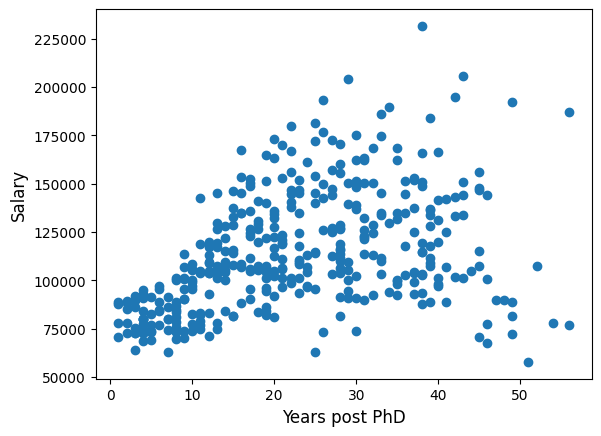

In [ ]:
# Plot a simple scatter of salary against years post PhD
plt.figure()
plt.scatter(salaries_df.years_post_phd, salaries_df.salary)
plt.xlabel("Years post PhD", fontsize="large")
plt.ylabel("Salary", fontsize="large")
plt.show()

If we colour these points based on the professors' ranks a very different
pattern emerges

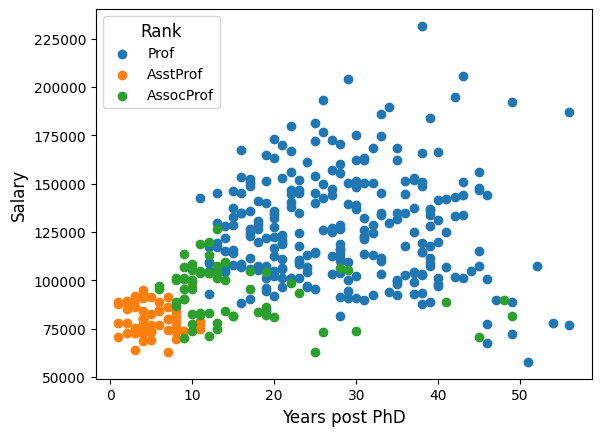

In [ ]:
# Extract the unique jobs
jobs = salaries_df["job"].unique()

# Plot scatters for each type of job
plt.figure()
for job in jobs:
    tmp = salaries_df[salaries_df["job"] == job]
    plt.scatter(tmp.years_post_phd, tmp.salary, label = job)
plt.legend(title = "Rank", title_fontsize = "large")
plt.xlabel("Years post PhD", fontsize="large")
plt.ylabel("Salary", fontsize="large")
plt.show()

### Question 1

What assumption of the variance component model clearly does not hold for this data set? Use some code to back up your statement.

### Answer

# Simulation

Before we analyse this data we should familiarise ourselves with the functionality provided by `statsmodels`. To have a data set where we know the "true" values we will simulate a very similar dataset. Note that we have set the mean values for each rank to the true values and set a constant scale across all the jobs of $15000$ (note $15000^{2} = 225000000$). The "years post PhD" is sampled randomly from a Poisson distribution with a relevant mean.

In [ ]:
# Generate an array of 100 repeats of each job
demo_job = np.repeat(a=['Prof', 'AsstProf', 'AssocProf'], repeats=100)

# Generate an array of random years post PhD using the relevant means
demo_ypp = np.concatenate(
    (stats.poisson.rvs(30, size = 100),
    stats.poisson.rvs(5, size = 100),
    stats.poisson.rvs(15, size = 100)))

# Define the salary means and scale
demo_salary_means = [126772,80775,93876]
demo_salary_scale = 15000

# Generate random salaries from a normal distribution where the means and variances are as above
demo_salary = stats.norm.rvs(loc = np.repeat(a=demo_salary_means, repeats=100), scale = demo_salary_scale, size = 300)

# Turn this into a df
demo_df = pd.DataFrame({'job': demo_job,
                      'years_post_phd': demo_ypp,
                       'salary': demo_salary})

# Extract the list of jobs again
jobs = demo_df["job"].unique()

We can use the same plotting code from before to confirm that this is a relevant dataset to work with.

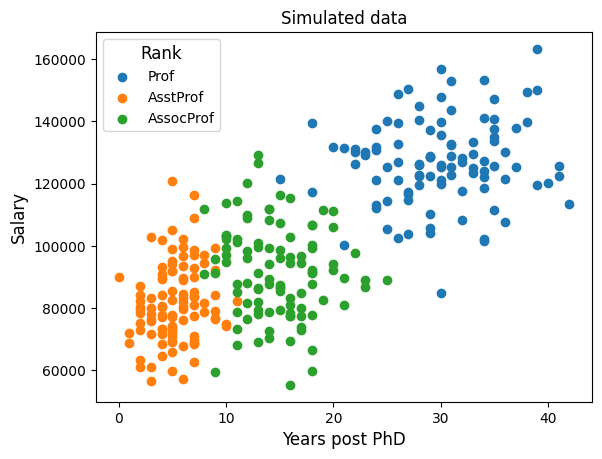

In [ ]:
# Same plot as before but for our simulated data
plt.figure()
for job in jobs:
    tmp = demo_df[demo_df["job"] == job]
    plt.scatter(tmp.years_post_phd, tmp.salary, label = job)
plt.title("Simulated data")
plt.legend(title = "Rank", title_fontsize = "large")
plt.xlabel("Years post PhD", fontsize="large")
plt.ylabel("Salary", fontsize="large")
plt.show()

### Question 2

As a way to get a rough idea of the components of the variance, estimate the variance among the known means and use it to compute the variance partition coefficient (VPC) for the simulated dataset. Obviously since we are estimating the variance based on a data set of size 3 we should not put too much faith in the results.

### Answer

### Question 3

Write down a way to describe the salaries with a variance components model. What parameters will be estimated?

Just use text for this but add mathematical equations.

### Answer

### Question 4

The following cell fits this model to the data. What are the estimated parameter values?

Hint: Due to an odd choice of names, the "Scale" parameter in the summary is the individual level variance.

In [ ]:
# Fit the model
mlm_0 = smf.mixedlm(formula = "salary ~ 1", data = demo_df, groups = demo_df.job).fit()
mlm_0.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:              MixedLM   Dependent Variable:   salary        
No. Observations:   300       Method:               REML          
No. Groups:         3         Scale:                187887955.1251
Min. group size:    100       Log-Likelihood:       -3280.9942    
Max. group size:    100       Converged:            Yes           
Mean group size:    100.0                                         
------------------------------------------------------------------
              Coef.      Std.Err.   z   P>|z|   [0.025    0.975]  
------------------------------------------------------------------
Intercept    100163.165 13694.098 7.314 0.000 73323.226 127003.105
Group Var 560706108.999 41103.719                                 
==================================================================

"""

### Answer

Note that because the data here have been randomly generated you may get different numbers...


### Question 5

Does this look reasonable?

Hint: Compare the model results with the averages from simulated data.

### Answer


### Question 6

Compute the VPC from the model fit. Does it agree with the previous estimate?

### Answer

### Question 7

Test whether including the effects of job is important in this model.

Hint: Use a likelihood ratio test for this.

### Answer

### Question 8

If we were to add `years_post_phd` as a covariate, what sort of model would this be? What was the name given to this type of model in the lecture?

### Answer



### Question 9

Fit the model including the `years_post_phd` as a covariate. Does this parameter have a significant association?

### Answer


### Question 10

Apply the methodology above to establish if `years_post_phd` has a significant association with a Professor's salary while adjusting for random job-specific effects.

### Answer

### Question 11

How much of the variance is explained by the professors rank?

### Answer